## **Project - GROUP 4**

**Import Basic Libraries**

In [66]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

**Import .CSV Dataset**

In [67]:
df_csv = pd.read_csv("travel insurance.csv",sep=",")

**Reading Columns In Dataset**

In [68]:
df_csv.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

**Reading Top Head Values**

In [69]:
df_csv.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


**Continuous Variables:-**

In [70]:
num_cols = df_csv._get_numeric_data().columns
con_var = []
for i in num_cols:
  if(len(df_csv[i].unique())) > int(df_csv.shape[0]/130):
     con_var.append(i)
print(con_var)  

['Net Sales', 'Commision (in value)']


In [71]:
print(len(df_csv['Duration'].unique()))
print(len(df_csv['Age'].unique()))
print(len(df_csv['Net Sales'].unique()))
print(len(df_csv['Commision (in value)'].unique()))

455
89
1139
1035


**Categorical Variables**

In [72]:
cat_var1=list(set(df_csv.columns) - set(con_var))
for i in cat_var1:
  print(i, "\t", len(df_csv[i].unique()))

Agency Type 	 2
Gender 	 3
Claim 	 2
Agency 	 16
Age 	 89
Product Name 	 26
Duration 	 455
Distribution Channel 	 2
Destination 	 149


**Task-1 - Perform Dataset overview, Uni-variate & Bi-variate analysis with Charts**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f736f09e518>,
      dtype=object)

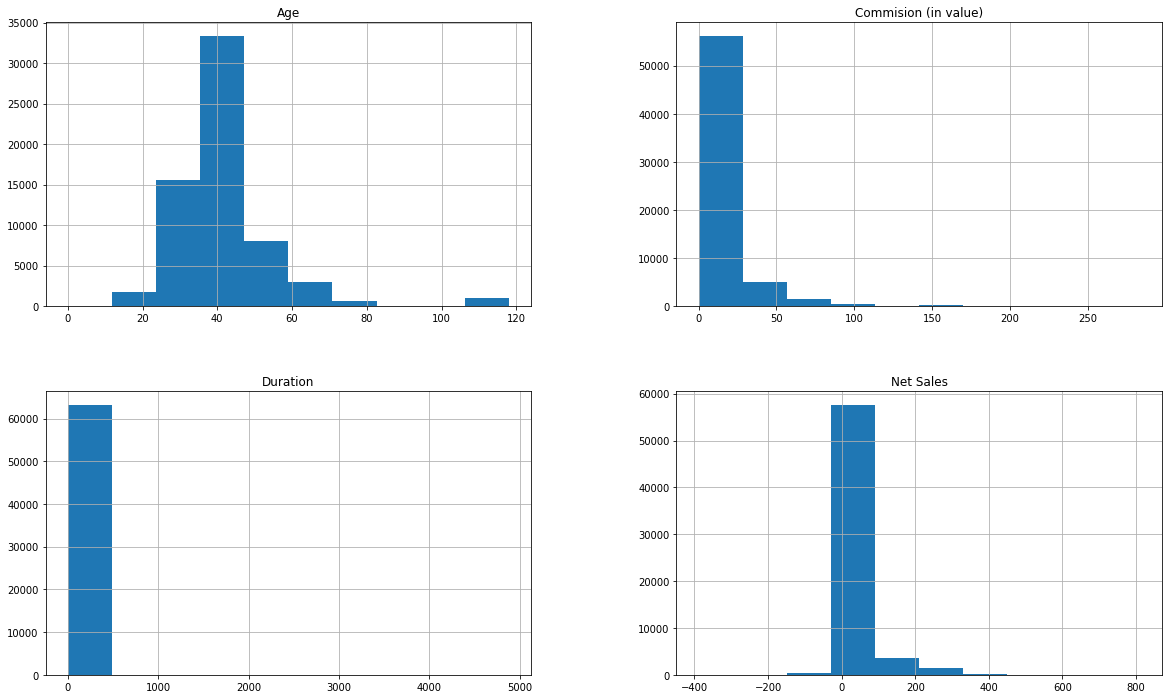

In [ ]:
df_csv.hist(figsize=[20,12])

**Inferences From Above Graph:-**
1. There are around 33500 peoples of age between 35 to 45 in agencies
2. There are around 15500 peoples of age between 25 to 35 in agencies
3. There are around 8000 peoples of age above 45 to 60 in agencies
4. There are around 100 peoples of age above 100 in the agencies also
5. There are more than 50000 peoples whose commision is in between 0 to 25 & around 500 peoples whose comission is between 25 to 55
6. There are some peoples whose commision is above 150 
7. The duration of all the claims by people in various industries is in between 0 to 400
8. The net sales of around 58000 peoples in various agencies is in negative i.e. -40 to 0 & some of them even touch -180
9. The net sales of around 58000 peoples in various agencies is in the same positive sacle i.e. 0 to 90
10. The net sales of around 3500 peoples in various agencies is in between 90 to 210 & some of them even touched above 400

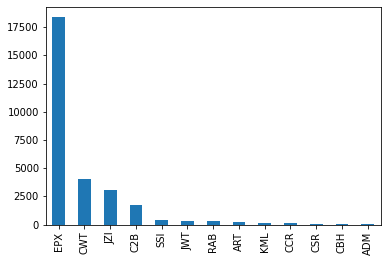

In [ ]:
df_csv['Agency'].value_counts().plot.bar()

**Inferences From Above Graph:-**
- The company which claims insurance maximum number of times i.e. 35000 is EPX & least number of times is ADM

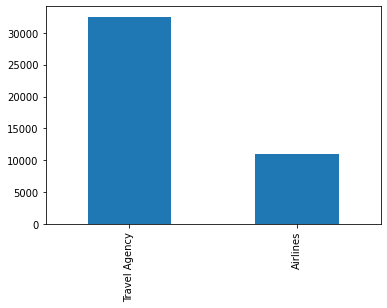

In [ ]:
df_csv['Agency Type'].value_counts().plot.bar()

**Inferences From Above Graph:-**
- There are such instances when travel agencies claims insurance maximum number of times as compared to airlines

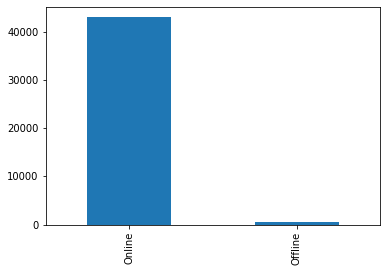

In [ ]:
df_csv['Distribution Channel'].value_counts().plot.bar()

**Inferences From Above Graph:-**
- There are maximum number of online distribution channels i.e. above 60000 as compared to the offline ones

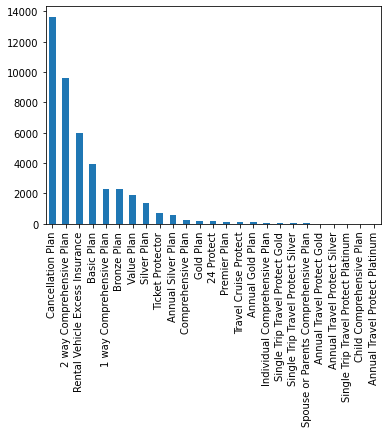

In [ ]:
df_csv['Product Name'].value_counts().plot.bar()

**Inferences From Above Graph:-**
- The product 'Cancellation Plan' has maximum number of instances i.e. above 17500 as compared to other products

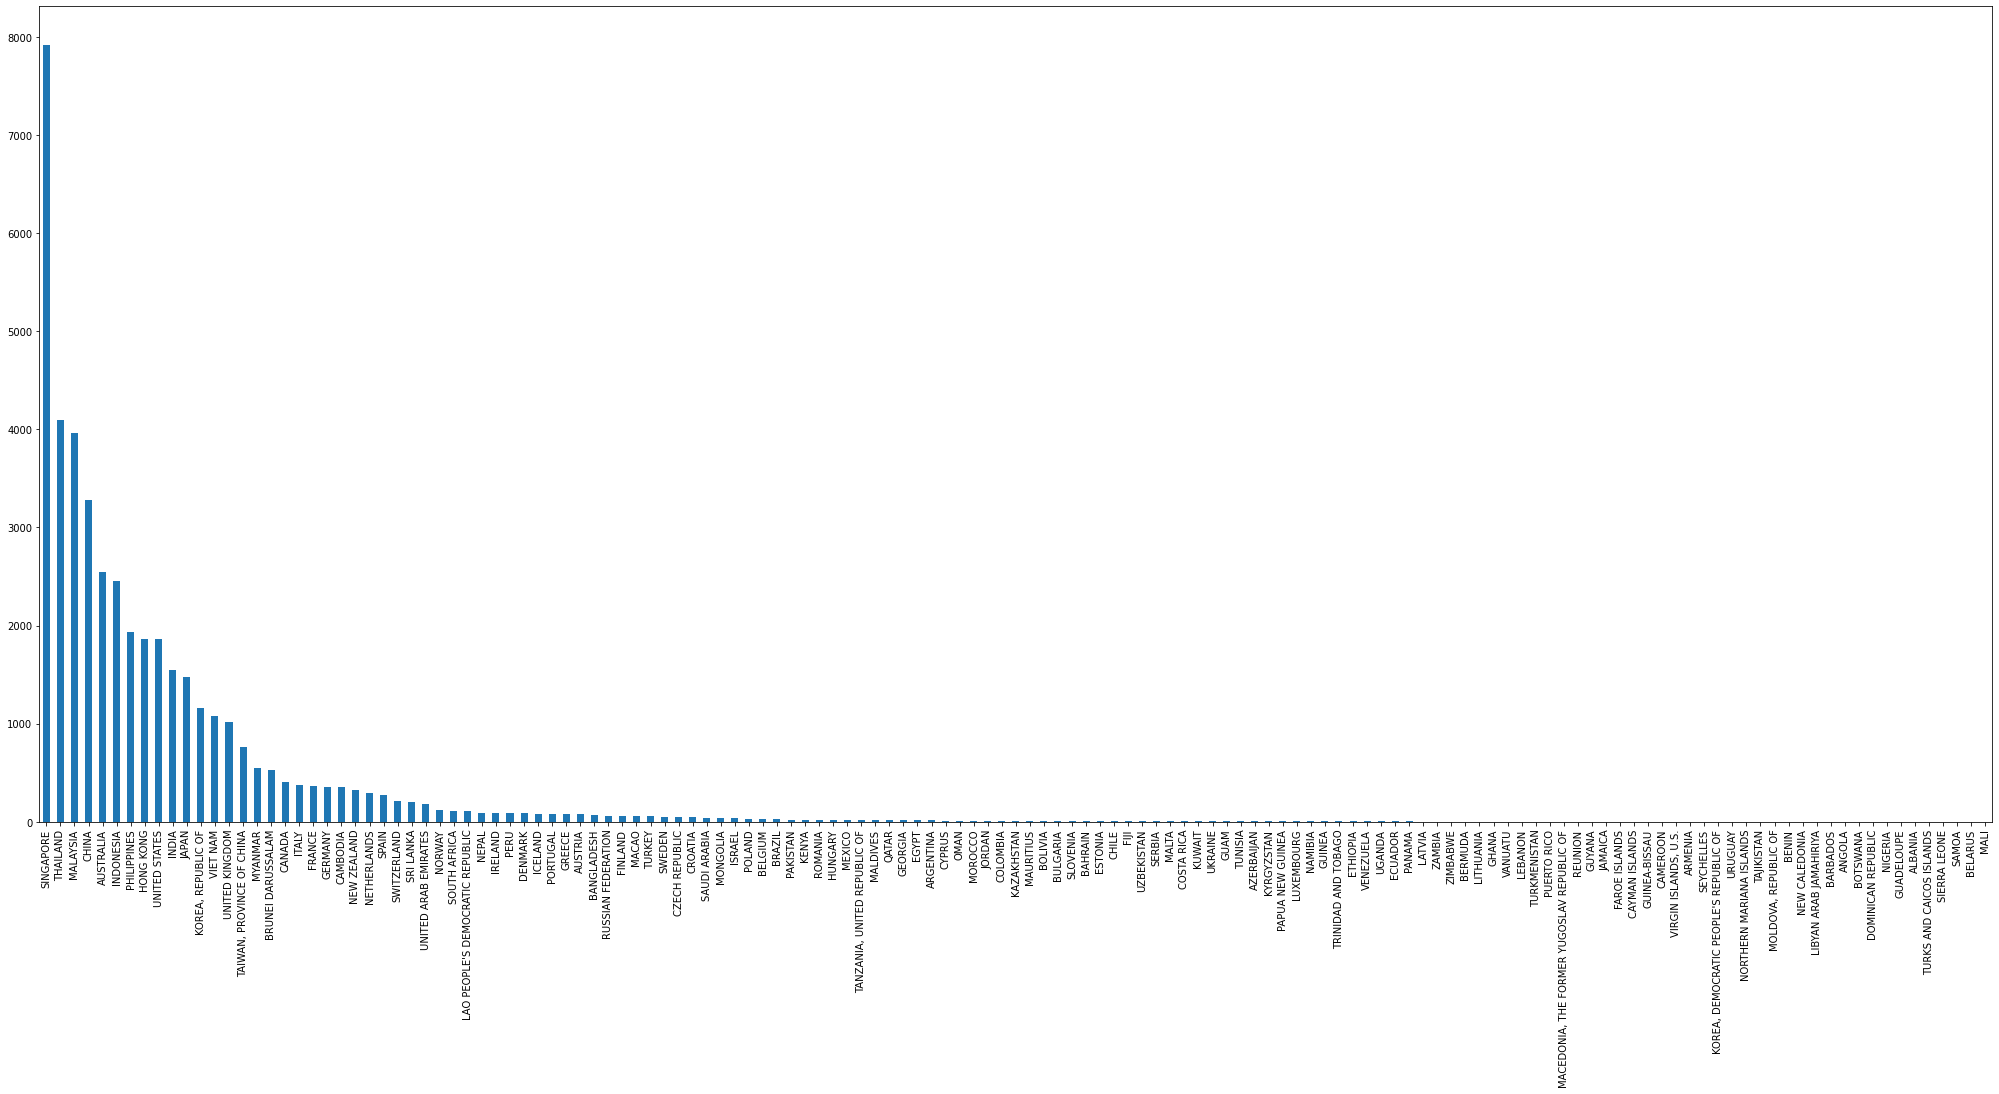

In [ ]:
df_csv['Destination'].value_counts().plot.bar(figsize=(35,15))

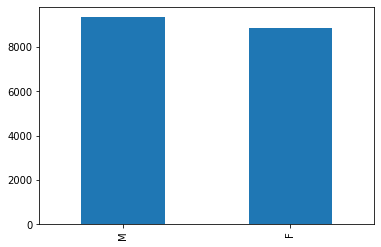

In [ ]:
df_csv['Gender'].value_counts().plot.bar()

**Inferences From Above Graph:-**
- There are slightly more count of males in various agencies as compared to their female counterparts

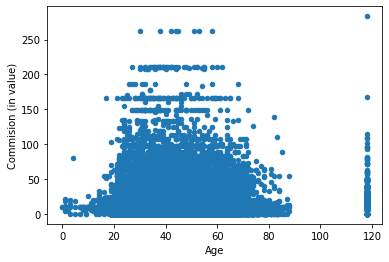

In [ ]:
df_csv.plot.scatter(x='Age', y='Commision (in value)')

**Inferences From Above Graph:-**
1. The commision of majority of people aged between 20 to 80 lies upto 100 & for 8-9 people it goes above 250 as well
2. The highest commision is earned by people of age about 118 which is near to 300

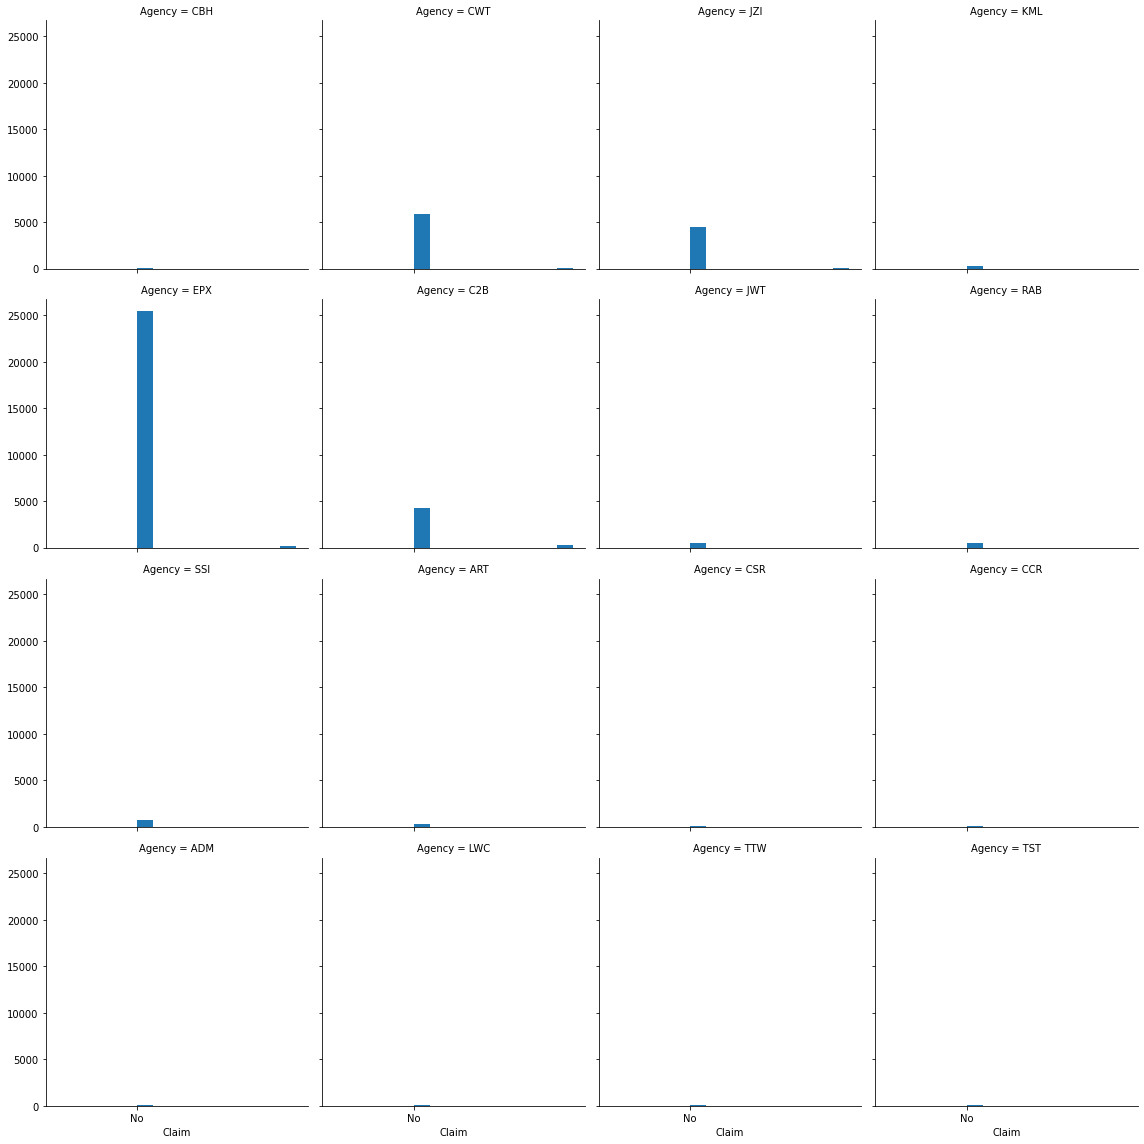

In [ ]:
fn = sns.FacetGrid(df_csv,col='Agency',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Claim')

**Inferences From Above Graph:-**
1. All the agencies reject majority of claims with EPX recorded higher rate of rejection
2. Only few agencies recorded some amount of acceptance which are C2B, EPX, CWT, JZI

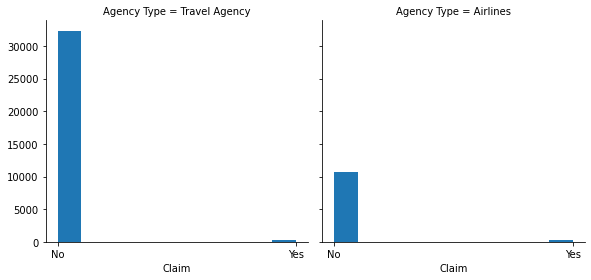

In [ ]:
fn = sns.FacetGrid(df_csv,col='Agency Type',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Claim')

**Inferences From Above Graph:-**
- Travel Agency recorded more amount of claims rejection rate as compared to Airlines but both of them recorded equal & small amount of acceptance 

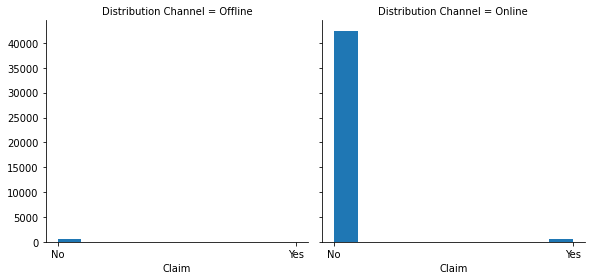

In [ ]:
fn = sns.FacetGrid(df_csv,col='Distribution Channel',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Claim')

**Inferences From Above Graph:-**
- The majority of claims are recorded in online distribution channel but with very high ratio of rejectance & also online distribution channel recorded more number of claim acceptance as comapred to offline ones

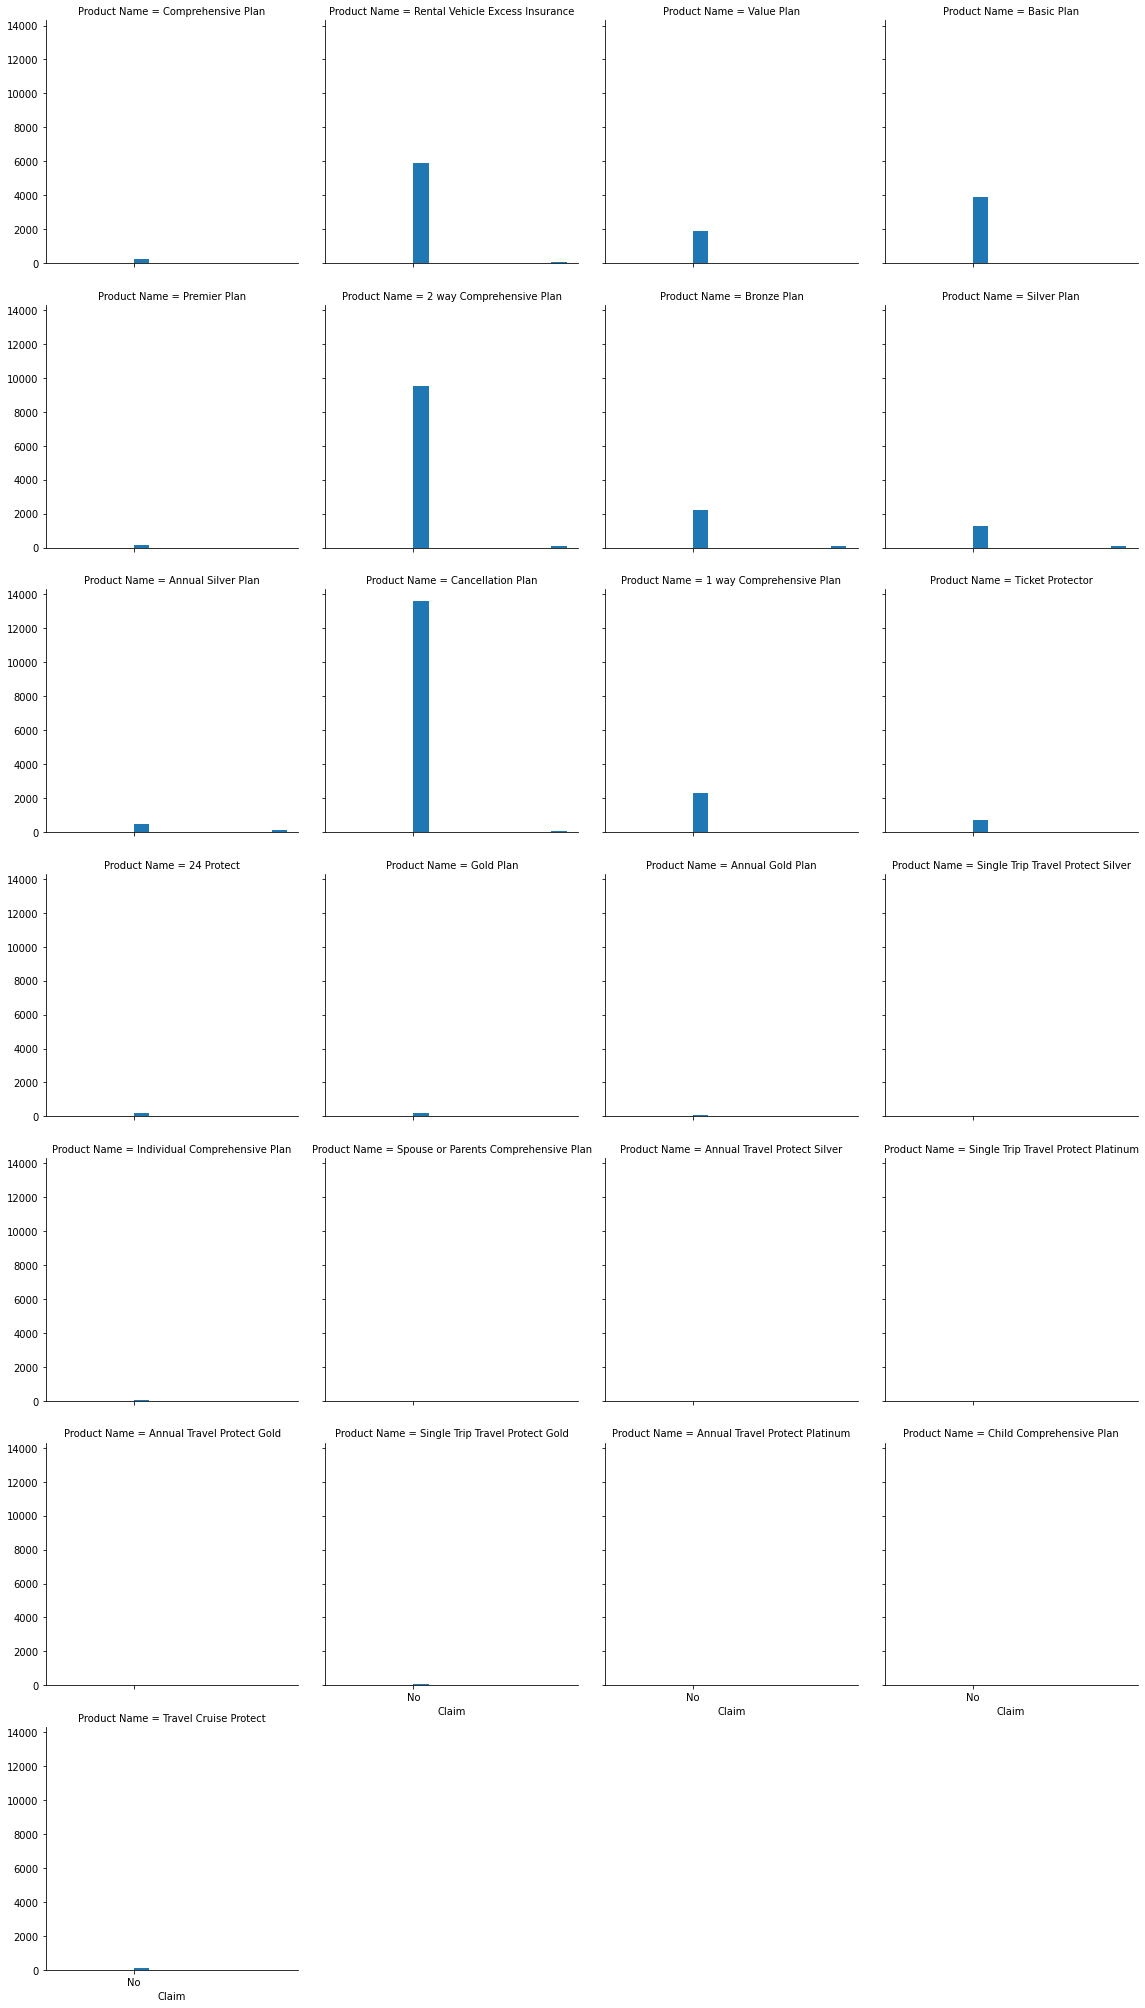

In [ ]:
fn = sns.FacetGrid(df_csv,col='Product Name',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Claim')

**Inferences From Above Graph:-**
- Only Products - Rental Vehicle Excess Insurance, 2 Way Comprehensive Plan, Bronze Plan, Silver Plan, Annual Silver Plan, Cancellation Plan recorded some amount of insurance claim acceptance & rest of products recorded rejectance

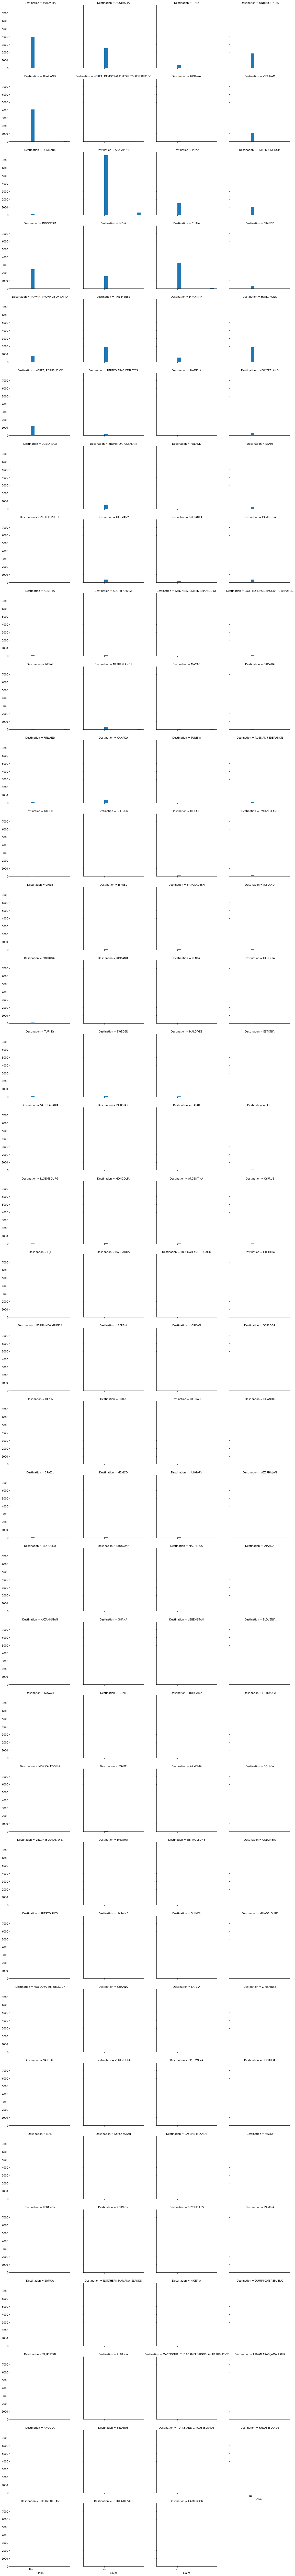

In [ ]:
fn = sns.FacetGrid(df_csv,col='Destination',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Claim')

**Inferences From Above Graph**
1. Agencies in singapore recorded high amount of claim rejectance 
2. There are very less number of countries who recorded few numbers of claim acceptance 

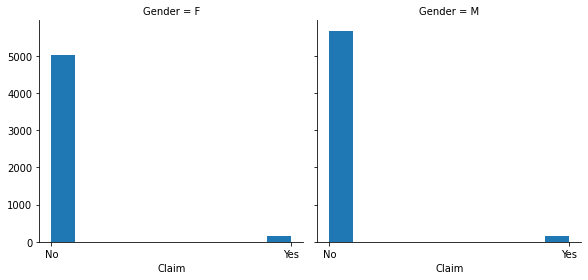

In [ ]:
fn = sns.FacetGrid(df_csv,col='Gender',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Claim')

**Inferences From Above Graph:-**
- Both males & females from various agencies recorded majority of claim rejectance as compared to acceptance 

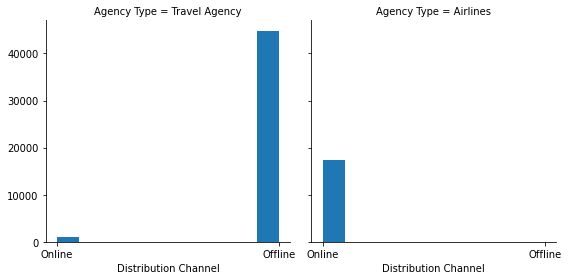

In [ ]:
fn = sns.FacetGrid(df_csv,col='Agency Type',height=4,aspect=1)
fn = fn.map(plt.hist,'Distribution Channel')

**Inferences From Above Graph:-**
1. There are more offline agencies who claims insurance when we talk about Travel Agency
2. There are no offline agencies who claims insurance when we talk about Airlines; all are online ones  

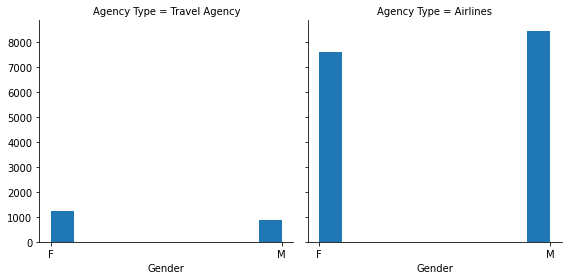

In [ ]:
fn = sns.FacetGrid(df_csv,col='Agency Type',height=4,aspect=1)
fn = fn.map(plt.hist,'Gender')

**Inferences From Above Graph:-**
1. There are majority of peoples worked in Airlines as compared to Travel Agency whether they are males or females
2. There are more females in Travel Agencies & more males in Airlines

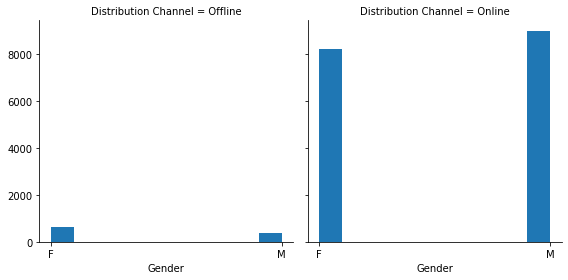

In [ ]:
fn = sns.FacetGrid(df_csv,col='Distribution Channel',height=4,aspect=1)
fn = fn.map(plt.hist,'Gender')

**Inferences From Above Graph:-**
1. The majority of agencies worked in online distribution channel than the offline ones
2. There are more females in offline distribution channel & more males in online distribution channel

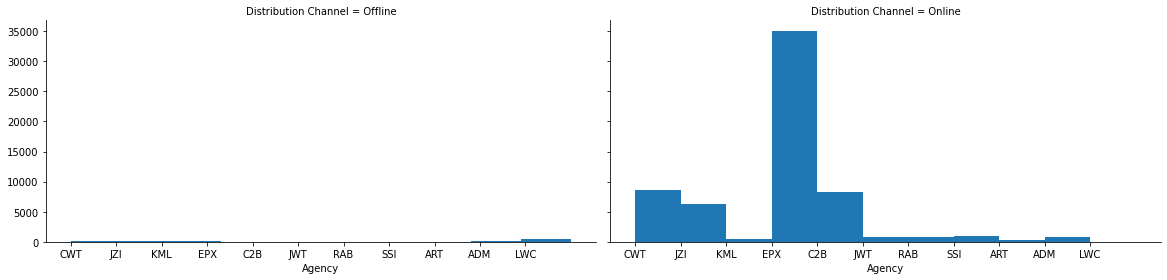

In [ ]:
fn = sns.FacetGrid(df_csv,col='Distribution Channel',col_wrap=4,height=4,aspect=2)
fn = fn.map(plt.hist,'Agency')

**Inferences From Above Graph:-**
1. There are almost none or very less number of agencies whose distribution channel is offline
2. The maximum number of insurance claim by agency for online distribution channel is EPX & least is ART

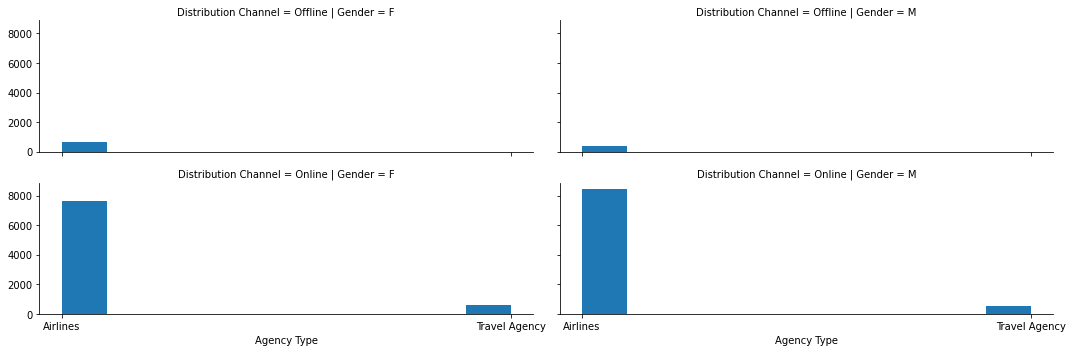

In [ ]:
fn = sns.FacetGrid(df_csv,col='Gender',row='Distribution Channel',palette="GnBu_d",gridspec_kws={"width_ratios": [4, 4]}, height=2.5,aspect=3)
fn = fn.map(plt.hist,"Agency Type")

**Inferences From Above Graph:-**
1. There are no travel agencies whose distribution channel is offline whether they are males or females
2. There are more number of airlines agency as compared to travel agency whose distribution channel is online whether they are males or females

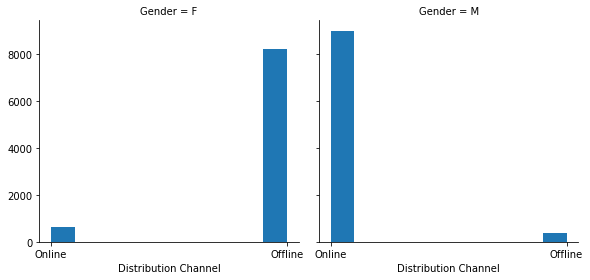

In [ ]:
fn = sns.FacetGrid(df_csv,col='Gender',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Distribution Channel')

**Inferences From Above Graph:-**
- There are more females in offline distribution channel & more males in online distribution channel

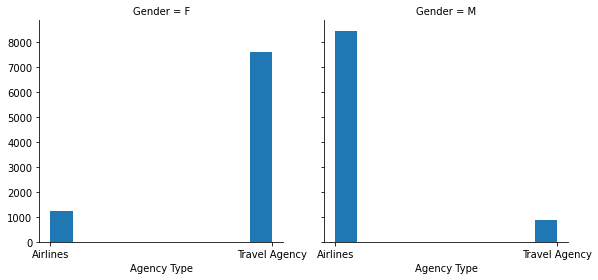

In [ ]:
fn = sns.FacetGrid(df_csv,col='Gender',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Agency Type')

**Inferences From Above Graph:-**
- There are more females in Travel Agency & more males in Airlines Agency

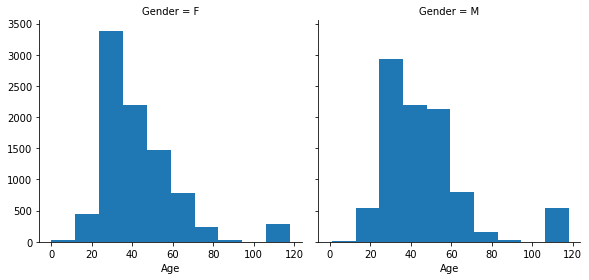

In [ ]:
fn = sns.FacetGrid(df_csv,col='Gender',col_wrap=4,height=4)
fn = fn.map(plt.hist,'Age')

**Inferences From Above Graph:-**
1. There are more peoples of age group 15 to 80 in both males & females 
2. There are some peoples of age group 105 to 118 in both males & females so they are treated as outliers & can be removed from the dataset

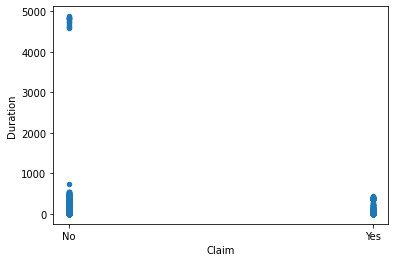

In [ ]:
df_csv.plot.scatter(x='Claim',y='Duration')

**Inferences From Above Graph:-**
- There is a bunch of some value of claim rejection in Durationwhich helps in distinguish the cases of claims being rejected or accepted in later half of our model building

**Task-2 - Identify Outliers, Missing Values If Any**

In [73]:
#Check Skewness
for i in con_var:
  print(str(i)+' : '+str(df_csv[i].skew()))

Net Sales : 3.272372822599944
Commision (in value) : 4.032268514691959


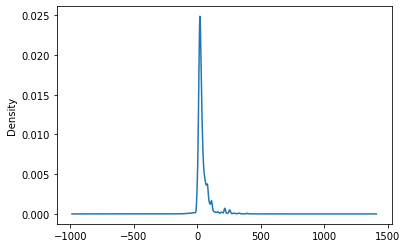

In [74]:
df_csv['Net Sales'].plot.kde()

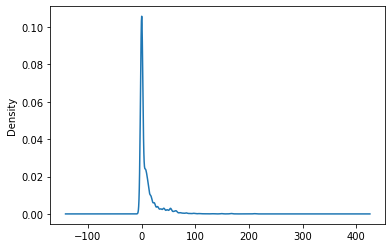

In [75]:
df_csv['Commision (in value)'].plot.kde()

In [76]:
#Using Quantile flooring  at 5% & 95%
for i in con_var:
  #Defning the lower & upper cap/cutoff
  lower_cutoff = df_csv[i].quantile(0.05)
  upper_cutoff = df_csv[i].quantile(0.95)
  #Replacing the Outliers from both ends with capped cutoffs
  df_csv[i] = np.where(df_csv[i] < lower_cutoff,lower_cutoff,df_csv[i])
  df_csv[i] = np.where(df_csv[i] > upper_cutoff, upper_cutoff,df_csv[i])
  print('Revised skew after Outlier handling '+str(i)+' : '+str(df_csv[i].skew()))

Revised skew after Outlier handling Net Sales : 1.3179346560049363
Revised skew after Outlier handling Commision (in value) : 1.8947098069504429


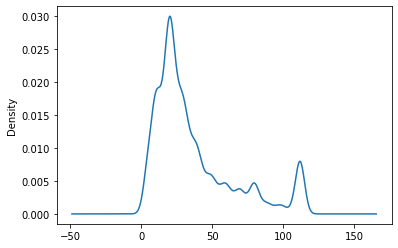

In [77]:
df_csv['Net Sales'].plot.kde()

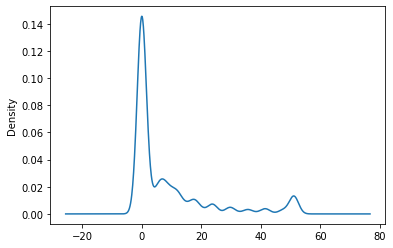

In [78]:
df_csv['Commision (in value)'].plot.kde()

-0.11890034049392048


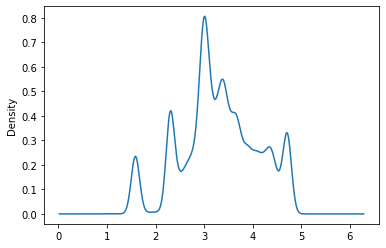

In [79]:
df_csv["Log_Net Sales"] = df_csv["Net Sales"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df_csv['Log_Net Sales'].skew())
df_csv['Log_Net Sales'].plot.kde()

In [81]:
df_csv.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
Log_Net Sales               0
dtype: int64

**Now We Take 2 Seperate Cases To Buil Performance Matrix Of Our Model**

**Case-1 - Imputing Column Gender With Some Dummy Value 'X' & Process Further**

**Case-2 - Removed The Column Gender From The Dataset Itself**

**From The Above 2 Cases, Whichever Gives The Best Results In Performance Matrix We Take That & Proceeds Towards Class Imbalance Problem**

**Case1 - As Gender Contains A Lot Of Missing Or Null Values, We Try To Imputted Some Dummy Value Like X In place Of Null Or Missing Values**

In [21]:
df_csv['Gender'].fillna("X", inplace = True) 
df_csv['Gender']

0        F
1        F
2        X
3        X
4        X
        ..
63321    M
63322    F
63323    M
63324    M
63325    F
Name: Gender, Length: 63326, dtype: object

In [22]:
#Checking Sparse rows , if >= 33.3% of columns of a record is not populated then remove the record itself
# Found no record Sparsely populated
rows_missing = df_csv.isnull().sum(axis=1).reset_index() 
rows_missing.columns = ['row','mis_cnt']
rows_missing[(rows_missing['mis_cnt'] > int(df_csv.shape[1]/3))]

,row,mis_cnt


In [23]:
df_csv.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
Log_Net Sales           0
dtype: int64

**Task-3 - Derive Correlation patterns of each Independent variable with Dependent variable (Claim)**

In [25]:
df_enc = df_csv.copy()

In [26]:
le = LabelEncoder()
df_enc['enc_Claim'] = le.fit_transform(df_enc['Claim'])
df_enc.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Log_Net Sales,enc_Claim
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,4.8825,9.57,F,81,1.585657,0
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,4.8825,9.57,F,71,1.585657,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,4.8825,29.70,X,32,1.585657,0
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,4.8825,23.76,X,32,1.585657,0
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,4.8825,11.88,X,41,1.585657,0


In [27]:
for j in cat_var1:
  df_enc['enc_'+str(j)] = le.fit_transform(df_enc[j])
df_enc = df_enc.drop(columns = cat_var1)
df_enc = df_enc.drop('enc_Claim',axis=1)

In [28]:
df_enc.shape

(63326, 11)

In [29]:
df_enc.head()

,Net Sales,Commision (in value),Log_Net Sales,enc_Agency Type,enc_Gender,enc_Agency,enc_Age,enc_Product Name,enc_Duration,enc_Distribution Channel,enc_Destination
0,4.8825,9.57,1.585657,1,0,3,80,12,188,0,79
1,4.8825,9.57,1.585657,1,0,3,70,12,188,0,79
2,4.8825,29.70,1.585657,1,2,6,31,16,67,1,4
3,4.8825,23.76,1.585657,1,2,6,31,16,62,1,4
4,4.8825,11.88,1.585657,1,2,6,40,16,81,1,61


In [30]:
corr = df_enc.corr()
corr.head(10)

,Net Sales,Commision (in value),Log_Net Sales,enc_Agency Type,enc_Gender,enc_Agency,enc_Age,enc_Product Name,enc_Duration,enc_Distribution Channel,enc_Destination
Net Sales,1.000000,0.542445,0.914147,-0.068737,-0.136771,-0.202411,0.038721,-0.036621,0.432805,0.000520,0.015790
Commision (in value),0.542445,1.000000,0.408353,-0.246294,-0.302463,-0.235838,0.151764,0.396936,0.421252,-0.004074,-0.043006
Log_Net Sales,0.914147,0.408353,1.000000,-0.061323,-0.159801,-0.184636,0.038019,-0.085569,0.298236,-0.027709,-0.028314
enc_Agency Type,-0.068737,-0.246294,-0.061323,1.000000,0.793093,0.207529,-0.209233,-0.272308,-0.124697,-0.076895,-0.150909
enc_Gender,-0.136771,-0.302463,-0.159801,0.793093,1.000000,0.228212,-0.172822,-0.243119,-0.170537,0.197634,-0.153557
enc_Agency,-0.202411,-0.235838,-0.184636,0.207529,0.228212,1.000000,0.136656,0.138890,-0.132776,-0.191928,-0.208348
enc_Age,0.038721,0.151764,0.038019,-0.209233,-0.172822,0.136656,1.000000,0.249311,0.004256,-0.164432,-0.028951
enc_Product Name,-0.036621,0.396936,-0.085569,-0.272308,-0.243119,0.138890,0.249311,1.000000,-0.088026,-0.155318,-0.069257
enc_Duration,0.432805,0.421252,0.298236,-0.124697,-0.170537,-0.132776,0.004256,-0.088026,1.000000,-0.058109,0.088793
enc_Distribution Channel,0.000520,-0.004074,-0.027709,-0.076895,0.197634,-0.191928,-0.164432,-0.155318,-0.058109,1.000000,-0.052289


In [31]:
df_enc.shape

(63326, 11)

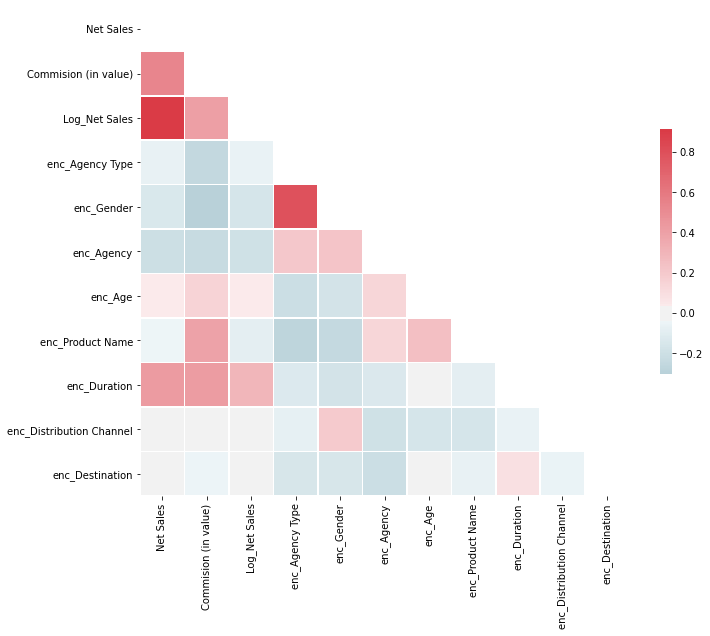

In [32]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

**Variables That Have Strong Correlations Are:-**
- (Log_Age , Age)
- (Net Sales , Duration)
- (Commision (in value) , Duration)
- (Commision (in value) , Net Sales)
- (Age , Commision (in value))
- (enc_Product Name, Commision (in value))

In [33]:
ohe = OneHotEncoder(handle_unknown='ignore')
df_ohe=df_csv.copy()
df_ohe.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Log_Net Sales
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,4.8825,9.57,F,81,1.585657
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,4.8825,9.57,F,71,1.585657
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,4.8825,29.70,X,32,1.585657
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,4.8825,23.76,X,32,1.585657
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,4.8825,11.88,X,41,1.585657


In [34]:
cat_var1 = list(set(cat_var1) - set(['Claim']))
cat_var1

['Agency Type',
 'Gender',
 'Agency',
 'Age',
 'Product Name',
 'Duration',
 'Distribution Channel',
 'Destination']

In [35]:
for i in list(set(cat_var1)-{'Duration', 'Age'}) :
  enc_rel = pd.DataFrame(ohe.fit_transform(df_ohe[[i]]).toarray())
  enc_rel = enc_rel.add_prefix(i+'_')
  df_ohe = df_ohe.join(enc_rel)
  df_ohe = df_ohe.drop(i,axis=1)
df_ohe = df_ohe.drop('Claim',axis=1)

In [36]:
df_ohe.head()

,Duration,Net Sales,Commision (in value),Age,Log_Net Sales,Agency Type_0,Agency Type_1,Gender_0,Gender_1,Gender_2,Agency_0,Agency_1,Agency_2,Agency_3,Agency_4,Agency_5,Agency_6,Agency_7,Agency_8,Agency_9,Agency_10,Agency_11,Agency_12,Agency_13,Agency_14,Agency_15,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Product Name_5,Product Name_6,Product Name_7,Product Name_8,Product Name_9,Product Name_10,Product Name_11,Product Name_12,Product Name_13,...,Destination_109,Destination_110,Destination_111,Destination_112,Destination_113,Destination_114,Destination_115,Destination_116,Destination_117,Destination_118,Destination_119,Destination_120,Destination_121,Destination_122,Destination_123,Destination_124,Destination_125,Destination_126,Destination_127,Destination_128,Destination_129,Destination_130,Destination_131,Destination_132,Destination_133,Destination_134,Destination_135,Destination_136,Destination_137,Destination_138,Destination_139,Destination_140,Destination_141,Destination_142,Destination_143,Destination_144,Destination_145,Destination_146,Destination_147,Destination_148
0,186,4.8825,9.57,81,1.585657,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,186,4.8825,9.57,71,1.585657,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,65,4.8825,29.70,32,1.585657,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60,4.8825,23.76,32,1.585657,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,79,4.8825,11.88,41,1.585657,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_ohe.shape

(63326, 203)

In [37]:
a=df_ohe.corr()
a.head()

,Duration,Net Sales,Commision (in value),Age,Log_Net Sales,Agency Type_0,Agency Type_1,Gender_0,Gender_1,Gender_2,Agency_0,Agency_1,Agency_2,Agency_3,Agency_4,Agency_5,Agency_6,Agency_7,Agency_8,Agency_9,Agency_10,Agency_11,Agency_12,Agency_13,Agency_14,Agency_15,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Product Name_5,Product Name_6,Product Name_7,Product Name_8,Product Name_9,Product Name_10,Product Name_11,Product Name_12,Product Name_13,...,Destination_109,Destination_110,Destination_111,Destination_112,Destination_113,Destination_114,Destination_115,Destination_116,Destination_117,Destination_118,Destination_119,Destination_120,Destination_121,Destination_122,Destination_123,Destination_124,Destination_125,Destination_126,Destination_127,Destination_128,Destination_129,Destination_130,Destination_131,Destination_132,Destination_133,Destination_134,Destination_135,Destination_136,Destination_137,Destination_138,Destination_139,Destination_140,Destination_141,Destination_142,Destination_143,Destination_144,Destination_145,Destination_146,Destination_147,Destination_148
Duration,1.000000,0.308796,0.308172,0.002468,0.198906,0.111588,-0.111588,0.102729,0.053993,-0.121071,0.001980,-0.013500,0.174739,0.016740,0.007348,0.011078,-0.030595,-0.111353,-0.021438,-0.049631,-0.006894,0.103999,-0.026903,0.093955,-0.007857,0.123765,-0.061759,-0.031994,-0.011761,0.176490,0.486260,0.129616,0.093470,0.124708,-0.049017,-0.059541,-0.062712,0.037105,0.018173,-0.013272,...,-0.002632,0.008978,0.000027,-0.000442,-0.007141,-0.000754,-0.000372,-0.000676,0.004360,0.155016,0.000418,-0.001613,-0.000717,0.015442,-0.009289,-0.000661,0.007408,-0.009921,0.000144,0.000915,-0.051279,-0.000793,0.002376,-0.001169,0.004204,-0.000183,-0.000286,0.003860,0.000825,-0.012727,0.007608,0.049773,-0.000208,0.000961,-0.001791,-0.000744,-0.039157,-0.001301,-0.001982,-0.001712
Net Sales,0.308796,1.000000,0.542445,0.043281,0.914147,0.068737,-0.068737,0.103589,0.076654,-0.139486,0.030356,-0.019939,0.204157,-0.012219,-0.011828,-0.006476,0.099213,-0.158901,0.048674,-0.058915,0.047899,0.095910,-0.070633,-0.130466,-0.023313,0.076492,-0.073323,0.100507,-0.029883,0.133113,0.378794,0.101610,0.075016,0.087653,-0.108783,-0.047048,-0.226881,0.015259,-0.021094,0.072354,...,0.015848,0.013470,0.004537,0.010300,0.006140,0.005909,0.003187,0.001107,0.005909,0.084219,0.010378,-0.000540,0.024854,0.031846,-0.016173,0.021353,0.047617,-0.022976,0.010300,0.016774,-0.124676,-0.001775,0.005596,0.013161,0.019743,0.012141,0.010300,0.004066,0.018124,0.025426,0.125790,0.190419,-0.002187,0.001460,0.004929,0.013643,-0.086792,0.005909,-0.004193,-0.002282
Commision (in value),0.308172,0.542445,1.000000,0.149100,0.408353,0.246294,-0.246294,0.212712,0.201553,-0.321018,0.070277,0.009755,0.258825,0.004090,0.006775,0.005834,0.571281,-0.673232,0.091890,0.070932,0.072401,0.191470,-0.010219,-0.062219,0.012560,-0.023754,-0.142168,-0.308997,-0.000665,0.165955,0.439326,0.119060,0.086645,0.110162,0.020698,-0.003009,-0.389533,-0.007193,0.007139,0.055879,...,-0.003461,-0.016751,-0.002398,-0.002398,-0.013859,-0.002398,-0.006344,-0.002398,-0.002398,0.106702,0.019634,-0.002398,0.051417,0.026345,-0.022800,0.014999,0.046241,-0.048128,-0.002398,-0.010989,-0.070635,-0.002398,0.001017,-0.001950,-0.004874,0.002629,-0.002398,-0.004795,-0.007583,0.011882,0.079556,0.037404,-0.002398,-0.004890,0.001031,-0.005361,-0.082358,-0.002398,-0.004153,-0.004153
Age,0.002468,0.043281,0.149100,1.000000,0.047012,0.221503,-0.221503,0.085551,0.194937,-0.218337,-0.041526,0.105208,-0.061391,0.048927,0.109161,0.046150,0.009090,-0.241700,0.609036,0.110156,0.044754,0.000170,0.020881,0.085688,0.068674,0.001890,-0.056371,-0.092777,0.038307,0.016611,0.004992,-0.002780,0.006490,0.000905,0.098029,-0.067433,-0.153403,-0.022940,0.123481,0.001236,...,-0.005221,-0.007916,-0.001126,-0.001126,-0.004003,-0.001409,-0.002978,-0.001126,-0.001126,-0.060368,-0.002842,-0.001126,-0.003036,-0.001562,-0.008191,-0.004612,-0.002322,-0.013489,

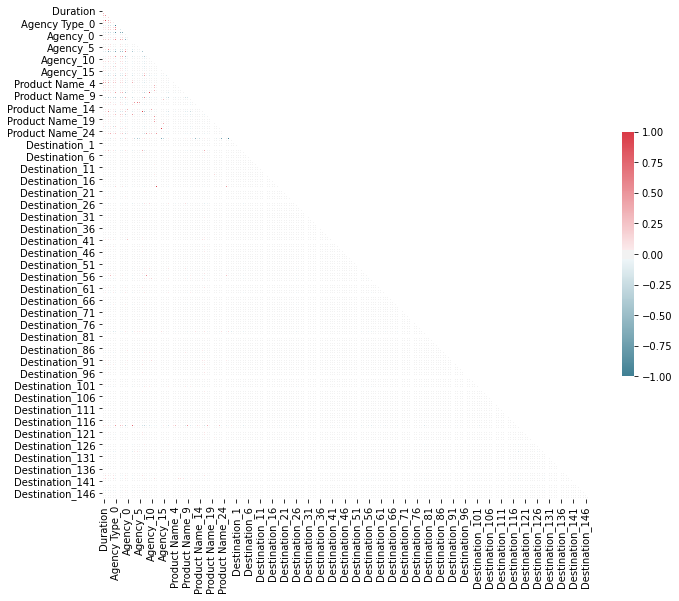

In [38]:
mask = np.zeros_like(a, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(a, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

**Task-4 - Using Target Variable - Claim, Identify class imbalance & explore methods to handle it**

In [39]:
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(df_csv['Claim']))
df_target.columns = (['Claim'])
df_target.head()

,Claim
0,0
1,0
2,0
3,0
4,0


In [40]:
print(df_target['Claim'].value_counts())
lbl_1,lbl_0 = df_target['Claim'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/df_target['Claim'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/df_target['Claim'].count()))

0    62399
1      927
Name: Claim, dtype: int64
Label 1 class %age: 98.53614629062312
Label 0 class %age: 1.4638537093768753


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(df_enc, df_target, test_size=0.25, random_state=80 , stratify=df_target)

In [42]:
print("Train Feature set:\t"+str(len(X_train)))
print("Train Label Feature set:\t"+str(len(Y_train)))
print("Test Feature set:\t"+str(len(X_test)))
print("Test label set:\t"+str(len(Y_test)))

Train Feature set:	47494
Train Label Feature set:	47494
Test Feature set:	15832
Test label set:	15832


In [43]:
#Stratified Sampling
print("For Training Data :")
print(Y_train['Claim'].value_counts())
lbl_1,lbl_0 = Y_train['Claim'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_train['Claim'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_train['Claim'].count()))
print("\nFor Test Set :")
print(Y_test['Claim'].value_counts())
lbl_1,lbl_0 = Y_test['Claim'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_test['Claim'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_test['Claim'].count()))

For Training Data :
0    46799
1      695
Name: Claim, dtype: int64
Label 1 class %age: 98.53665726196994
Label 0 class %age: 1.463342738030067

For Test Set :
0    15600
1      232
Name: Claim, dtype: int64
Label 1 class %age: 98.53461344113188
Label 0 class %age: 1.4653865588681152


In [44]:
clf_dt = RandomForestClassifier(random_state=80)
clf_dt.fit(X_train, Y_train)
print(clf_dt)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=80, verbose=0,
                       warm_start=False)


In [45]:
y_pred = clf_dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
#Using Dtree without Gridsearch
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred)*100,'%')
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred)*100,'%')
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred)*100,'%')
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred)*100,'%')

----Parameter tuning without GridSearch-----
Confusion Matrix
[[15551    49]
 [  230     2]]
Accuracy of Dtree Model:
98.2377463365336 %
Precision of DTree Model:
3.9215686274509802 %
Recall of DTree Model:
0.8620689655172413 %
F1 Score of DTree Model:
1.4134275618374559 %


In [48]:
roc_auc_score(Y_test,y_pred)

0.5027398320070734

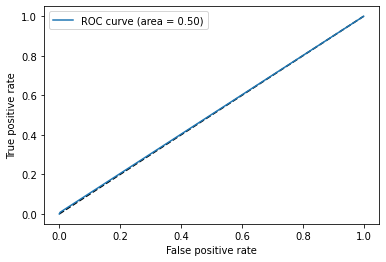

In [49]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

In [50]:
#Using GridSearch , find the optimal hyperparameters

clf_dt = RandomForestClassifier()
param_grid = {
   'max_leaf_nodes': [  10,20,30,40,50 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'] ,
   'max_depth' : [ 30, 20, 75, 50, 100 ],
   'min_samples_split': [ 2, 3, 4]
    }
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, Y_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [51]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred)*100,'%')
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred)*100,'%')
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred)*100,'%')
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred)*100,'%')

----Parameter tuning using GridSearch-----
Confusion Matrix
[[13011  2589]
 [   75   157]]
Accuracy of Dtree Model:
83.1733198585144 %
Precision of DTree Model:
5.71740713765477 %
Recall of DTree Model:
67.67241379310344 %
F1 Score of DTree Model:
10.543989254533242 %


In [52]:
roc_auc_score(Y_test,y_pred)

0.755381299734748

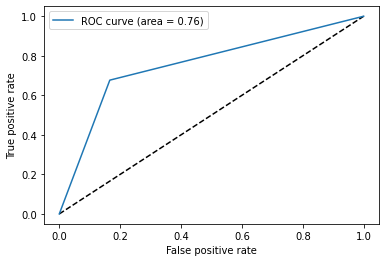

In [53]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(df_ohe, df_target, test_size=0.25, random_state=80 , stratify=df_target)

In [55]:
print("Train Feature set:\t"+str(len(X_train)))
print("Train Label Feature set:\t"+str(len(Y_train)))
print("Test Feature set:\t"+str(len(X_test)))
print("Test label set:\t"+str(len(Y_test)))

Train Feature set:	47494
Train Label Feature set:	47494
Test Feature set:	15832
Test label set:	15832


In [56]:
#Stratified Sampling
print("For Training Data :")
print(Y_train['Claim'].value_counts())
lbl_1,lbl_0 = Y_train['Claim'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_train['Claim'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_train['Claim'].count()))
print("\nFor Test Set :")
print(Y_test['Claim'].value_counts())
lbl_1,lbl_0 = Y_test['Claim'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_test['Claim'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_test['Claim'].count()))

For Training Data :
0    46799
1      695
Name: Claim, dtype: int64
Label 1 class %age: 98.53665726196994
Label 0 class %age: 1.463342738030067

For Test Set :
0    15600
1      232
Name: Claim, dtype: int64
Label 1 class %age: 98.53461344113188
Label 0 class %age: 1.4653865588681152


In [57]:
clf_dt = RandomForestClassifier(random_state=80)
clf_dt.fit(X_train, Y_train)
print(clf_dt)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=80, verbose=0,
                       warm_start=False)


In [58]:
y_pred = clf_dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
#Using Dtree without Gridsearch
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred)*100,'%')
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred)*100,'%')
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred)*100,'%')
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred)*100,'%')

----Parameter tuning without GridSearch-----
Confusion Matrix
[[15551    49]
 [  228     4]]
Accuracy of Dtree Model:
98.25037897928247 %
Precision of DTree Model:
7.547169811320755 %
Recall of DTree Model:
1.7241379310344827 %
F1 Score of DTree Model:
2.807017543859649 %


In [60]:
roc_auc_score(Y_test,y_pred)

0.5070501768346596

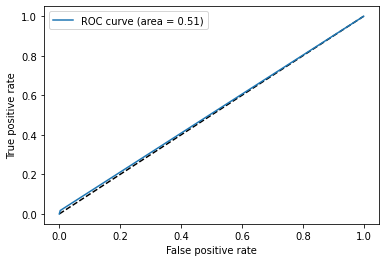

In [61]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

In [62]:
#Using GridSearch , find the optimal hyperparameters

clf_dt = RandomForestClassifier()
param_grid = {
   'max_leaf_nodes': [ 10,20,30,40,50 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'] ,
   'max_depth' : [ 30, 20, 75, 50, 100 ],
   'min_samples_split': [ 2, 3, 4]
    }
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, Y_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [63]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred)*100,'%')
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred)*100,'%')
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred)*100,'%')
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred)*100,'%')

----Parameter tuning using GridSearch-----
Confusion Matrix
[[13183  2417]
 [   76   156]]
Accuracy of Dtree Model:
84.25341081354219 %
Precision of DTree Model:
6.062961523513408 %
Recall of DTree Model:
67.24137931034483 %
F1 Score of DTree Model:
11.122994652406417 %


In [64]:
roc_auc_score(Y_test,y_pred)

0.7587389478337755

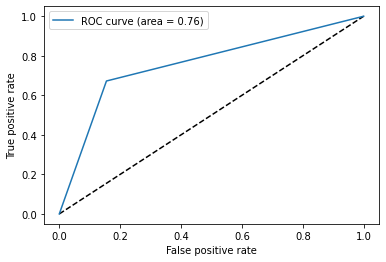

In [65]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

**Case-2 - Removed The Column Gender From The Dataset Itself**

In [82]:
df_csv = df_csv.drop(columns = 'Gender')

In [83]:
#Checking Sparse rows , if >= 33.3% of columns of a record is not populated then remove the record itself
# Found no record Sparsely populated
rows_missing = df_csv.isnull().sum(axis=1).reset_index() 
rows_missing.columns = ['row','mis_cnt']
rows_missing[(rows_missing['mis_cnt'] > int(df_csv.shape[1]/3))]

,row,mis_cnt


In [84]:
df_csv.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Log_Net Sales           0
dtype: int64

In [93]:
df_enc = df_csv.copy()

In [94]:
le = LabelEncoder()
df_enc['enc_Claim'] = le.fit_transform(df_enc['Claim'])
df_enc.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age,Log_Net Sales,enc_Claim
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,4.8825,9.57,81,1.585657,0
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,4.8825,9.57,71,1.585657,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,4.8825,29.70,32,1.585657,0
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,4.8825,23.76,32,1.585657,0
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,4.8825,11.88,41,1.585657,0


In [95]:
cat_var1 = list(set(cat_var1) - set(['Gender']))
cat_var1

['Agency Type',
 'Claim',
 'Agency',
 'Age',
 'Product Name',
 'Duration',
 'Distribution Channel',
 'Destination']

In [96]:
for j in cat_var1:
  df_enc['enc_'+str(j)] = le.fit_transform(df_enc[j])
df_enc = df_enc.drop(columns = cat_var1)
df_enc = df_enc.drop('enc_Claim',axis=1)

In [97]:
df_enc.head()

,Net Sales,Commision (in value),Log_Net Sales,enc_Agency Type,enc_Agency,enc_Age,enc_Product Name,enc_Duration,enc_Distribution Channel,enc_Destination
0,4.8825,9.57,1.585657,1,3,80,12,188,0,79
1,4.8825,9.57,1.585657,1,3,70,12,188,0,79
2,4.8825,29.70,1.585657,1,6,31,16,67,1,4
3,4.8825,23.76,1.585657,1,6,31,16,62,1,4
4,4.8825,11.88,1.585657,1,6,40,16,81,1,61


In [98]:
corr = df_enc.corr()
corr.head(10)

,Net Sales,Commision (in value),Log_Net Sales,enc_Agency Type,enc_Agency,enc_Age,enc_Product Name,enc_Duration,enc_Distribution Channel,enc_Destination
Net Sales,1.000000,0.542445,0.914147,-0.068737,-0.202411,0.038721,-0.036621,0.432805,0.000520,0.015790
Commision (in value),0.542445,1.000000,0.408353,-0.246294,-0.235838,0.151764,0.396936,0.421252,-0.004074,-0.043006
Log_Net Sales,0.914147,0.408353,1.000000,-0.061323,-0.184636,0.038019,-0.085569,0.298236,-0.027709,-0.028314
enc_Agency Type,-0.068737,-0.246294,-0.061323,1.000000,0.207529,-0.209233,-0.272308,-0.124697,-0.076895,-0.150909
enc_Agency,-0.202411,-0.235838,-0.184636,0.207529,1.000000,0.136656,0.138890,-0.132776,-0.191928,-0.208348
enc_Age,0.038721,0.151764,0.038019,-0.209233,0.136656,1.000000,0.249311,0.004256,-0.164432,-0.028951
enc_Product Name,-0.036621,0.396936,-0.085569,-0.272308,0.138890,0.249311,1.000000,-0.088026,-0.155318,-0.069257
enc_Duration,0.432805,0.421252,0.298236,-0.124697,-0.132776,0.004256,-0.088026,1.000000,-0.058109,0.088793
enc_Distribution Channel,0.000520,-0.004074,-0.027709,-0.076895,-0.191928,-0.164432,-0.155318,-0.058109,1.000000,-0.052289
enc_Destination,0.015790,-0.043006,-0.028314,-0.150909,-0.208348,-0.028951,-0.069257,0.088793,-0.052289,1.000000


In [99]:
df_enc.shape

(63326, 10)

In [100]:
ohe = OneHotEncoder(handle_unknown='ignore')
df_ohe=df_csv.copy()
df_ohe.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age,Log_Net Sales
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,4.8825,9.57,81,1.585657
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,4.8825,9.57,71,1.585657
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,4.8825,29.70,32,1.585657
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,4.8825,23.76,32,1.585657
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,4.8825,11.88,41,1.585657


In [101]:
cat_var1 = list(set(cat_var1) - set(['Claim']))
cat_var1

['Agency Type',
 'Agency',
 'Age',
 'Product Name',
 'Duration',
 'Distribution Channel',
 'Destination']

In [102]:
for i in list(set(cat_var1)-{'Duration', 'Age'}) :
  enc_rel = pd.DataFrame(ohe.fit_transform(df_ohe[[i]]).toarray())
  enc_rel = enc_rel.add_prefix(i+'_')
  df_ohe = df_ohe.join(enc_rel)
  df_ohe = df_ohe.drop(i,axis=1)
df_ohe = df_ohe.drop('Claim',axis=1)

In [103]:
df_ohe.head()

,Duration,Net Sales,Commision (in value),Age,Log_Net Sales,Agency Type_0,Agency Type_1,Agency_0,Agency_1,Agency_2,Agency_3,Agency_4,Agency_5,Agency_6,Agency_7,Agency_8,Agency_9,Agency_10,Agency_11,Agency_12,Agency_13,Agency_14,Agency_15,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Product Name_5,Product Name_6,Product Name_7,Product Name_8,Product Name_9,Product Name_10,Product Name_11,Product Name_12,Product Name_13,Product Name_14,Product Name_15,Product Name_16,...,Destination_109,Destination_110,Destination_111,Destination_112,Destination_113,Destination_114,Destination_115,Destination_116,Destination_117,Destination_118,Destination_119,Destination_120,Destination_121,Destination_122,Destination_123,Destination_124,Destination_125,Destination_126,Destination_127,Destination_128,Destination_129,Destination_130,Destination_131,Destination_132,Destination_133,Destination_134,Destination_135,Destination_136,Destination_137,Destination_138,Destination_139,Destination_140,Destination_141,Destination_142,Destination_143,Destination_144,Destination_145,Destination_146,Destination_147,Destination_148
0,186,4.8825,9.57,81,1.585657,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,186,4.8825,9.57,71,1.585657,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,65,4.8825,29.70,32,1.585657,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60,4.8825,23.76,32,1.585657,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,79,4.8825,11.88,41,1.585657,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
df_ohe.shape

(63326, 200)

In [105]:
le = LabelEncoder()
df_target = pd.DataFrame(le.fit_transform(df_csv['Claim']))
df_target.columns = (['Claim'])
df_target.head()

,Claim
0,0
1,0
2,0
3,0
4,0


In [106]:
print(df_target['Claim'].value_counts())
lbl_1,lbl_0 = df_target['Claim'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/df_target['Claim'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/df_target['Claim'].count()))

0    62399
1      927
Name: Claim, dtype: int64
Label 1 class %age: 98.53614629062312
Label 0 class %age: 1.4638537093768753


In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(df_enc, df_target, test_size=0.25, random_state=80 , stratify=df_target)

In [108]:
print("Train Feature set:\t"+str(len(X_train)))
print("Train Label Feature set:\t"+str(len(Y_train)))
print("Test Feature set:\t"+str(len(X_test)))
print("Test label set:\t"+str(len(Y_test)))

Train Feature set:	47494
Train Label Feature set:	47494
Test Feature set:	15832
Test label set:	15832


In [109]:
#Stratified Sampling
print("For Training Data :")
print(Y_train['Claim'].value_counts())
lbl_1,lbl_0 = Y_train['Claim'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_train['Claim'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_train['Claim'].count()))
print("\nFor Test Set :")
print(Y_test['Claim'].value_counts())
lbl_1,lbl_0 = Y_test['Claim'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_test['Claim'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_test['Claim'].count()))

For Training Data :
0    46799
1      695
Name: Claim, dtype: int64
Label 1 class %age: 98.53665726196994
Label 0 class %age: 1.463342738030067

For Test Set :
0    15600
1      232
Name: Claim, dtype: int64
Label 1 class %age: 98.53461344113188
Label 0 class %age: 1.4653865588681152


In [110]:
clf_dt = RandomForestClassifier(random_state=80)
clf_dt.fit(X_train, Y_train)
print(clf_dt)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=80, verbose=0,
                       warm_start=False)


In [111]:
y_pred = clf_dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
#Using Dtree without Gridsearch
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred)*100,'%')
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred)*100,'%')
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred)*100,'%')
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred)*100,'%')

----Parameter tuning without GridSearch-----
Confusion Matrix
[[15551    49]
 [  232     0]]
Accuracy of Dtree Model:
98.22511369378473 %
Precision of DTree Model:
0.0 %
Recall of DTree Model:
0.0 %
F1 Score of DTree Model:
0.0 %


In [113]:
roc_auc_score(Y_test,y_pred)

0.4984294871794872

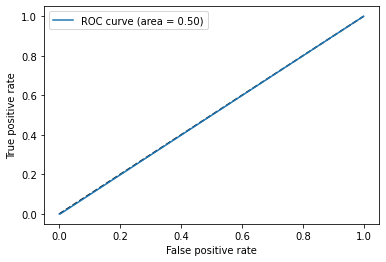

In [114]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

In [115]:
#Using GridSearch , find the optimal hyperparameters

clf_dt = RandomForestClassifier()
param_grid = {
   'max_leaf_nodes': [  10,20,30,40,50 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'] ,
   'max_depth' : [ 30, 20, 75, 50, 100 ],
   'min_samples_split': [ 2, 3, 4]
    }
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, Y_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [116]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred)*100,'%')
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred)*100,'%')
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred)*100,'%')
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred)*100,'%')

----Parameter tuning using GridSearch-----
Confusion Matrix
[[12989  2611]
 [   79   153]]
Accuracy of Dtree Model:
83.00909550277919 %
Precision of DTree Model:
5.535455861070912 %
Recall of DTree Model:
65.94827586206897 %
F1 Score of DTree Model:
10.213618157543392 %


In [117]:
roc_auc_score(Y_test,y_pred)

0.7460554818744474

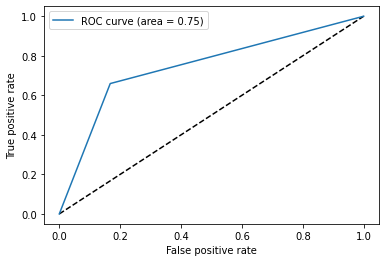

In [118]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(df_ohe, df_target, test_size=0.25, random_state=80 , stratify=df_target)

In [120]:
print("Train Feature set:\t"+str(len(X_train)))
print("Train Label Feature set:\t"+str(len(Y_train)))
print("Test Feature set:\t"+str(len(X_test)))
print("Test label set:\t"+str(len(Y_test)))

Train Feature set:	47494
Train Label Feature set:	47494
Test Feature set:	15832
Test label set:	15832


In [121]:
#Stratified Sampling
print("For Training Data :")
print(Y_train['Claim'].value_counts())
lbl_1,lbl_0 = Y_train['Claim'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_train['Claim'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_train['Claim'].count()))
print("\nFor Test Set :")
print(Y_test['Claim'].value_counts())
lbl_1,lbl_0 = Y_test['Claim'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/Y_test['Claim'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/Y_test['Claim'].count()))

For Training Data :
0    46799
1      695
Name: Claim, dtype: int64
Label 1 class %age: 98.53665726196994
Label 0 class %age: 1.463342738030067

For Test Set :
0    15600
1      232
Name: Claim, dtype: int64
Label 1 class %age: 98.53461344113188
Label 0 class %age: 1.4653865588681152


In [122]:
clf_dt = RandomForestClassifier(random_state=80)
clf_dt.fit(X_train, Y_train)
print(clf_dt)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=80, verbose=0,
                       warm_start=False)


In [123]:
y_pred = clf_dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
#Using Dtree without Gridsearch
print("----Parameter tuning without GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred)*100,'%')
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred)*100,'%')
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred)*100,'%')
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred)*100,'%')

----Parameter tuning without GridSearch-----
Confusion Matrix
[[15552    48]
 [  232     0]]
Accuracy of Dtree Model:
98.23143001515918 %
Precision of DTree Model:
0.0 %
Recall of DTree Model:
0.0 %
F1 Score of DTree Model:
0.0 %


In [125]:
roc_auc_score(Y_test,y_pred)

0.49846153846153846

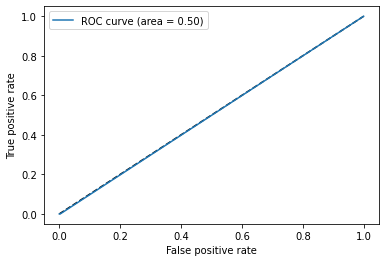

In [126]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

In [127]:
#Using GridSearch , find the optimal hyperparameters

clf_dt = RandomForestClassifier()
param_grid = {
   'max_leaf_nodes': [ 10,20,30,40,50 ],
   'class_weight' : ['balanced'],
   'criterion' :['gini','entropy'] ,
   'max_depth' : [ 30, 20, 75, 50, 100 ],
   'min_samples_split': [ 2, 3, 4]
    }
CV_dt = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv= 3)
CV_dt.fit(X_train, Y_train)
clf_best_dt = CV_dt.best_estimator_
print(clf_best_dt)
y_pred = clf_best_dt.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=100, max_features='auto',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [128]:
#Using Gridsearch optimal parameter tuning
print("----Parameter tuning using GridSearch-----")
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred)*100,'%')
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred)*100,'%')
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred)*100,'%')
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred)*100,'%')

----Parameter tuning using GridSearch-----
Confusion Matrix
[[13331  2269]
 [   83   149]]
Accuracy of Dtree Model:
85.14401212733705 %
Precision of DTree Model:
6.162117452440033 %
Recall of DTree Model:
64.22413793103449 %
F1 Score of DTree Model:
11.245283018867926 %


In [129]:
roc_auc_score(Y_test,y_pred)

0.7483963306808133

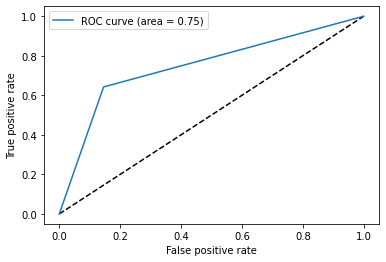

In [130]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

***So, If we see the performance matrix of our model:-***

**Case1:-  In the case of gender being imputted with dummy value(X), the performance of the model is relatively low in both label & one hot encoding before using gridsearchCv but after tunning the parameters using gridsearchCv, our model performance begins to improve upto some extent & we get better results**

**Case2:-  In the case of gender being removed from the dataset, we can see that the performance of the model is Zero as precision, recall & F1 score is 0% in both label & one hot encoding before using gridsearchCv but again after tunning the parameters using gridsearchCv, our model performance begins to improve & it gives us the same result as we got in Case1 after tunning the parameters.**

***Conclusion:-***

**- If we looking at the dataset with the gender's point of view, there is no need to remove the column 'Gender' from the dataset as we can see, it leads to Zero performance of model before tunning the parameters.**

**- Rather, if we want to remove gender from our dataset then we must keep in mind to tune our parameters since it is the only way to keep our model performance better.**

**- From my point of view, there is no need to remove gender & process towards class imbalance problem with gender being imputted with some dummy value X.**